In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Flatten


In [4]:
# (a) Preprocessing the Data
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()


In [3]:
# Normalize pixelvalues between 0 and 1
x_train = x_train / 255.0
x_test = x_test/ 255.0

In [5]:
# One-hot encode the labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [6]:
# (b) Divide data into training and testing dataset
# The data is already Divided as x_train,y_train for training and x_test,y_test for testing

In [7]:
# (c) Build the Recurrent Neural Network (RNN) Model
model = Sequential()
# Add an RNN layer with 128 units and an input shape of (28, 28) which corresponds to the flattened images
model.add(SimpleRNN(128, input_shape=(28, 28), activation='relu'))
model.add(Dense(10, activation='softmax'))  # 10 output units for the 10 classes (digits 0-9)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
# (d) Train the RNN Model
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.1)


Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 13s 15ms/step - accuracy: 0.9239 - loss: 0.2580 - val_accuracy: 0.9417 - val_loss: 0.2184
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.9309 - loss: 0.2330 - val_accuracy: 0.9488 - val_loss: 0.1925
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.9409 - loss: 0.2036 - val_accuracy: 0.9577 - val_loss: 0.1593
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.9469 - loss: 0.1849 - val_accuracy: 0.9567 - val_loss: 0.1831
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 22s 15ms/step - accuracy: 0.9532 - loss: 0.1655 - val_accuracy: 0.9702 - val_loss: 0.1263


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense



In [12]:
# Load the dataset (replace with your Kaggle data)
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
data = pd.read_csv(url, usecols=[1])
data = data.values



In [13]:
# Preprocess the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Function to create a time-series dataset
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [14]:
# Define time step (how many past time points are used for prediction)
time_step = 10
X, y = create_dataset(scaled_data, time_step)

# Reshape X to be [samples, time steps, features] which is required for LSTM
X = X.reshape(X.shape[0], X.shape[1], 1)


In [15]:
# Split into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build the LSTM Model
model = Sequential()
model.add(LSTM(100, input_shape=(time_step, 1), return_sequences=True))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(1))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [16]:
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1)

# Evaluate the model on the test data
test_loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")

# Predict the test dataset
predicted = model.predict(X_test)


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 206ms/step - loss: 0.1072 - val_loss: 0.2045
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0485 - val_loss: 0.0789
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0198 - val_loss: 0.0206
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0141 - val_loss: 0.0330
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0168 - val_loss: 0.0213
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0091 - val_loss: 0.0270
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0104 - val_loss: 0.0350
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0104 - val_loss: 0.0333
Epoch 9/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0086 - val_loss: 0.0255
Epoch 10/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0072 - val_loss: 0.0216
Epoch 11/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0084 - val_loss: 0.0254
Epoch 12/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0073 - val_loss: 0.0250


In [17]:
# Inverse transform the predictions and actual values to compare
predicted = scaler.inverse_transform(predicted)
y_test_scaled = scaler.inverse_transform([y_test])



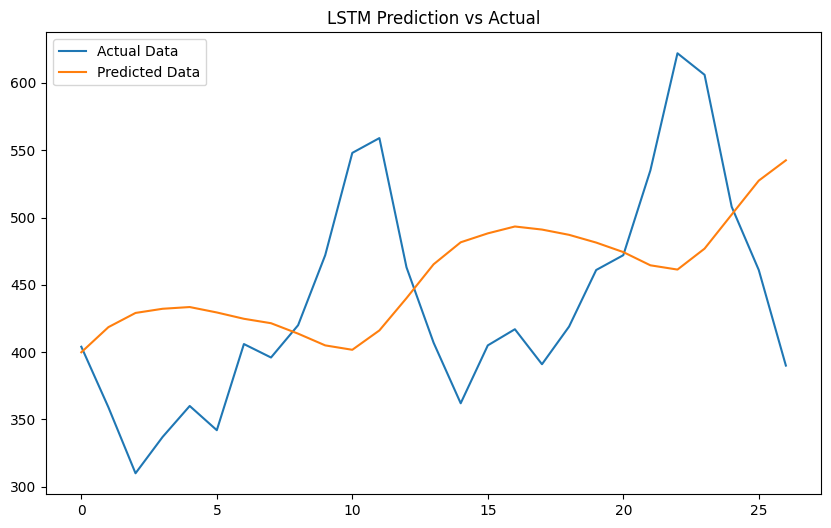

In [18]:
# Plot the results
plt.figure(figsize=(10,6))
plt.plot(y_test_scaled[0], label='Actual Data')
plt.plot(predicted, label='Predicted Data')
plt.title('LSTM Prediction vs Actual')
plt.legend()
plt.show()

In [23]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import Callback
# Custom callback to record gradients
class GradientTracker(Callback):
    def on_train_begin(self, logs=None):
        self.epoch_gradients = []
    def on_epoch_end(self, epoch, logs=None):
        # Get the gradients for each layer
        weights = self.model.trainable_weights  # Variables of the model
        #gradients = self.model.optimizer.get_gradients(self.model.total_loss, weights)


In [25]:
#self.epoch_gradients.append(gradients)
# Create a simple deep network to show gradient issues
def create_deep_model(activation_function='sigmoid'):
    model = Sequential()
    # A deep network of 10 hidden layers with 128 neurons each
    model.add(Dense(128, input_shape=(10,), activation=activation_function))
    for _ in range(9):  # Adding more layers to make the network deep
        model.add(Dense(128, activation=activation_function))
    model.add(Dense(1))  # Output layer
    return model
# Generate random data
np.random.seed(42)
X = np.random.randn(1000, 10)  # 1000 samples with 10 features
y = np.random.randn(1000, 1)   # Random target values



In [35]:
# Create a simple deep network to show gradient issues
def create_deep_model(activation_function='sigmoid'):
    model = Sequential()
    # A deep network of 10 hidden layers with 128 neurons each
    model.add(Dense(128, input_shape=(10,), activation=activation_function))
    for _ in range(9):  # Adding more layers to make the network deep
        model.add(Dense(128, activation=activation_function))
    model.add(Dense(1))  # Output layer
    return model
# Generate random data
np.random.seed(42)
X = np.random.randn(1000, 10)  # 1000 samples with 10 features
y = np.random.randn(1000, 1)   # Random target values

# Create a deep network using sigmoid (vanishing gradient case)
model = create_deep_model(activation_function='sigmoid')

# Compile the model using SGD optimizer
model.compile(optimizer=SGD(learning_rate=0.01), loss='mean_squared_error')

# Instantiate the gradient tracker callback
gradient_tracker = GradientTracker()

# Train the model and track the gradients
history = model.fit(X, y, epochs=10, batch_size=32, verbose=1, callbacks=[gradient_tracker])

# Analyze the gradients
gradients = gradient_tracker.epoch_gradients



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.9302
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9448
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.9960
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9882
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.0070
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9818
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9515
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9475
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9449
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.8691


In [29]:
# Function to calculate the magnitude of gradients
def calculate_gradient_magnitude(gradients):
    grad_norms = []
    for epoch_grad in gradients:
        epoch_norms = []
        for grad in epoch_grad:
            if grad is not None:
                norm = np.linalg.norm(grad.numpy())
                epoch_norms.append(norm)
        grad_norms.append(np.mean(epoch_norms))
    return grad_norms


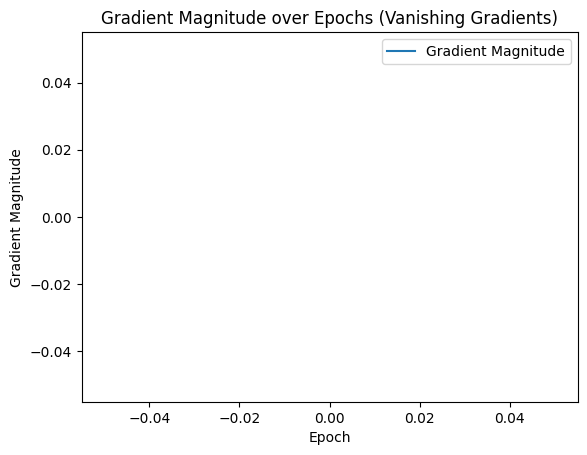

In [36]:
# Calculate the gradient norms for each epoch
gradient_magnitudes = calculate_gradient_magnitude(gradients)

# Plot the gradient norms over epochs
plt.plot(range(1, len(gradient_magnitudes) + 1), gradient_magnitudes, label="Gradient Magnitude")
plt.title("Gradient Magnitude over Epochs (Vanishing Gradients)")
plt.xlabel("Epoch")
plt.ylabel("Gradient Magnitude")
plt.legend()
plt.show()